In [3]:
import numpy as np

In [1]:
import sarPrm as sp
import SARdata as Sd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as sc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage.interpolation import rotate
from PIL import Image
import matplotlib.colors as colors
from copy import copy

190


In [5]:
def plot_mag(data2):
    
    fig, ax = plt.subplots(1,2,figsize=(18,6))#,sharex=True)

    ## Magnitude
    # a) Definicion y lectura de parametros
    Im = data2['Im']
    Lx = data2['Lx']
    Ly = data2['Ly']
    dx = data2['dx']
    dy = data2['dy']

    r_data2 = abs(Im)
    r_data2 = 20*np.log10(r_data2)
    R_max = 10.25
    xlabel_name='Azimut(m)'; ylabel_name='Rango(m)'; title_name='Resultado Algoritmo Back Projection'
    x_min=-(Lx+dx)/2; x_max=(Lx+dx)/2; y_min=0-dy/2; y_max=Ly+dy/2; unit_bar='(dB)'
    xgrid = np.tile(np.linspace(x_min,x_max, Im.shape[0]),(Im.shape[0],1))
    ygrid = np.tile(np.linspace(y_min,y_max, Im.shape[1]),(Im.shape[0],1)).T
    origin_n='lower'; ticks = None
    vmin = -100 #dB
    vmax = -20

    t_sq = -20; t_vis = 40
    r= np.linspace(0,y_max,100); sq = np.pi*(90+t_sq)/180; s_max = np.pi*(90+t_sq+t_vis)/180; s_min = np.pi*(90+t_sq-t_vis)/180
    th_lm = np.arctan2(ygrid,xgrid)
    fc = th_lm > s_min; sc = th_lm < s_max; tc = (xgrid**2+ygrid**2)**0.5 < y_max
    r_data = r_data2*(fc*sc*tc)
    cmap = copy(plt.get_cmap('plasma')) # plasma, cubehelix, CMRmap
    levels = np.arange(vmin-5, vmax+5, 0.5)
    #norm = colors.BoundaryNorm(levels, ncolors=cmap.N)
    #colores = cmap(np.linspace(0.3, 1, 100))
    #cmap = colors.LinearSegmentedColormap.from_list("mycmap", colores)
    cmap.set_over('white', 0)
    im2 =ax[0].imshow(r_data,cmap=cmap,origin=origin_n,extent=[x_min, x_max, y_min, y_max], aspect='auto',vmin=vmin,vmax=vmax)
    # Linea de vision
    x_vis = r*np.cos(sq); y_vis = r*np.sin(sq)
    ax[0].plot(x_vis[x_vis < x_max], y_vis[x_vis < x_max], 'r-.', linewidth= 4)

    # Limites angulares
    #x_a1 = r*np.cos(s_max); y_a1 = r*np.sin(s_max)
    #x_a2 = r*np.cos(s_min); y_a2 = r*np.sin(s_min)
    #ax[0].plot(x_a1[x_a1<x_max], y_a1[x_a1<x_max], 'g--', linewidth= 4)
    #ax[0].plot(x_a2[x_a2<x_max], y_a2[x_a2<x_max], 'g--', linewidth= 4)
    ax[0].set(xlabel=xlabel_name, ylabel=ylabel_name, title="Resultado Algoritmo Back Projection") # Origin 'upper': esquina superior izquierda; 'lower': esquina inferior izquierda
    divider1 = make_axes_locatable(ax[0])
    cax1 = divider1.append_axes("right", size="5%", pad=0.1) # pad es el espaciado con la grafica principal
    sfmt=ticker.ScalarFormatter(useMathText=True)
    m=fig.colorbar(im2,cax=cax1,label=unit_bar,extend='both',ticks=None,format=sfmt)
    m.formatter.set_powerlimits((0, 0))
    m.ax.yaxis.set_offset_position('left')
    m.update_ticks()
    ax[0].grid(ls='--')
    shade_lowest = False

    fig.suptitle("Gráficas de Magnitud")

    fig.subplots_adjust(left=0.065, right=0.95, wspace=0.3)
    #fig.tight_layout() # cuadra bien las imagenes
    #fig.savefig("../figures/"+"RD1_2)"+"prueba_"+prueba+"_mag",orientation='landscape')

    return 'Ok'

# Blancos puntuales: Pruebas de media y varianza 

In [2]:
prueba = "2"
data_mag_a0 = np.load('../image_data/last/verificar_mag0.npy', allow_pickle='TRUE')[300:500,500:700]
data_mag_a5 = np.load('../image_data/last/verificar_mag-5.npy', allow_pickle='TRUE')[300:500,500:700]
data_mag_a10 = np.load('../image_data/last/verificar_mag-10.npy', allow_pickle='TRUE')[300:500,500:700]
data_mag_a15 = np.load('../image_data/last/verificar_mag-15.npy', allow_pickle='TRUE')[300:500,500:700]

data_fase_a0 = np.load('../image_data/last/verificar_fase0.npy', allow_pickle='TRUE')[300:500,500:700]
data_fase_a5 = np.load('../image_data/last/verificar_fase-5.npy', allow_pickle='TRUE')[300:500,500:700]
data_fase_a10 = np.load('../image_data/last/verificar_fase-10.npy', allow_pickle='TRUE')[300:500,500:700]
data_fase_a15 = np.load('../image_data/last/verificar_fase-15.npy', allow_pickle='TRUE')[300:500,500:700]


In [3]:
Lx = 10; Ly = 10; dx = dy = 1.25*0.01
x_c=np.arange(-Lx/2,Lx/2+dx,dx)
y_c=np.arange(0,0+Ly+dy,dy)
x_c2=np.arange(0,801,1)
y_c2=np.arange(0,801,1)

In [4]:
def properties_bp(ax, bp,means) :
    colors = ['blue','red','green','yellow']

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # changing color and linewidth of
    # medians
    k= 0
    for median in bp['medians']:
        median.set(color ='black',
                linewidth = 3)
        x, y = median.get_xydata()[0] # top of median line
        #ax.text(x+0.24, y + 0.05, '%.1f' % x,
        #   horizontalalignment='center', color = 'k', fontsize=9) # draw above, centered
        ax.text(x+0.24, y + 0.5, 'Mean: ' + str('%.1f' % means[k]),
            horizontalalignment='center', color = 'k', fontsize=9) # draw above, centered
        k += 1
    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                color ='#e7298a',
                alpha = 0.25)

    # changing color and linewidth of
    # caps
    for cap in bp['caps']:
        cap.set(color = '#8B008B',
                linewidth = 2)

    # changing color and linewidth of
    # whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 1.5,
                    linestyle =":")

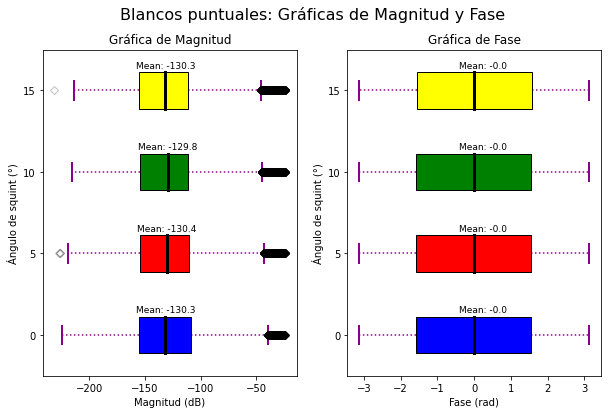

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10, 6))

data_mag_rs_a0 = data_mag_a0.reshape((data_mag_a0.shape[0]*data_mag_a0.shape[1],))
data_mag_rs_a5 = data_mag_a5.reshape((data_mag_a5.shape[0]*data_mag_a5.shape[1],))
data_mag_rs_a10 = data_mag_a10.reshape((data_mag_a10.shape[0]*data_mag_a10.shape[1],))
data_mag_rs_a15 = data_mag_a15.reshape((data_mag_a15.shape[0]*data_mag_a15.shape[1],))

data_fase_rs_a0 = data_fase_a0.reshape((data_fase_a0.shape[0]*data_fase_a0.shape[1],))
data_fase_rs_a5 = data_fase_a5.reshape((data_fase_a5.shape[0]*data_fase_a5.shape[1],))
data_fase_rs_a10 = data_fase_a10.reshape((data_fase_a10.shape[0]*data_fase_a10.shape[1],))
data_fase_rs_a15 = data_fase_a15.reshape((data_fase_a15.shape[0]*data_fase_a15.shape[1],))

data_mag = [data_mag_rs_a0, data_mag_rs_a5, data_mag_rs_a10, data_mag_rs_a15]
data_fase = [data_fase_rs_a0, data_fase_rs_a5, data_fase_rs_a10, data_fase_rs_a15]

bp = ax[0].boxplot(data_mag, patch_artist = True, vert = 0, notch = 0)
ax[0].set_yticklabels([0, 5, 10, 15])
ax[0].set_ylabel('Ángulo de squint (°)')
ax[0].set_xlabel('Magnitud (dB)')
ax[0].set_title('Gráfica de Magnitud')

means = np.mean(data_mag,1)

properties_bp(ax[0], bp, means)

bp2 = ax[1].boxplot(data_fase, patch_artist = True, vert = 0, notch = 0)
ax[1].set_yticklabels([0, 5, 10, 15])
ax[1].set_ylabel('Ángulo de squint (°)')
ax[1].set_xlabel('Fase (rad)')
ax[1].set_title('Gráfica de Fase')
means = np.mean(data_fase,1)

properties_bp(ax[1], bp2, means)

fig.suptitle('Blancos puntuales: Gráficas de Magnitud y Fase', fontsize=16)
      


plt.show()

# Blanco pseudo continuo: media y varianza

In [218]:
data_pc_mag_a0 = np.load('../image_data/last/verificar_pc_mag0.npy', allow_pickle='TRUE')[260:580,500:710]
data_pc_mag_a5 = np.load('../image_data/last/verificar_pc_mag-5.npy', allow_pickle='TRUE')[260:580,500:710]
data_pc_mag_a10 = np.load('../image_data/last/verificar_pc_mag-10.npy', allow_pickle='TRUE')[260:580,500:710]
data_pc_mag_a15 = np.load('../image_data/last/verificar_pc_mag-15.npy', allow_pickle='TRUE')[260:580,500:710]

data_pc_fase_a0 = np.load('../image_data/last/verificar_pc_fase0.npy', allow_pickle='TRUE')[260:580,500:710]
data_pc_fase_a5 = np.load('../image_data/last/verificar_pc_fase-5.npy', allow_pickle='TRUE')[260:580,500:710]
data_pc_fase_a10 = np.load('../image_data/last/verificar_pc_fase-10.npy', allow_pickle='TRUE')[260:580,500:710]
data_pc_fase_a15 = np.load('../image_data/last/verificar_pc_fase-15.npy', allow_pickle='TRUE')[260:580,500:710]


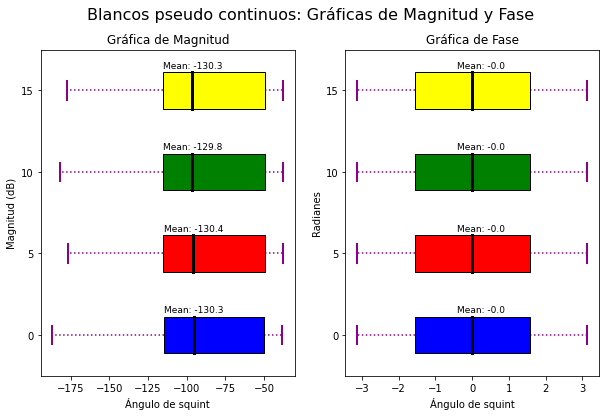

In [224]:
fig, ax = plt.subplots(1,2,figsize=(10, 6))

data_pc_mag_rs_a0 = data_pc_mag_a0.reshape((data_pc_mag_a0.shape[0]*data_pc_mag_a0.shape[1],))
data_pc_mag_rs_a5 = data_pc_mag_a5.reshape((data_pc_mag_a5.shape[0]*data_pc_mag_a5.shape[1],))
data_pc_mag_rs_a10 = data_pc_mag_a10.reshape((data_pc_mag_a10.shape[0]*data_pc_mag_a10.shape[1],))
data_pc_mag_rs_a15 = data_pc_mag_a15.reshape((data_pc_mag_a15.shape[0]*data_pc_mag_a15.shape[1],))

data_pc_fase_rs_a0 = data_pc_fase_a0.reshape((data_pc_fase_a0.shape[0]*data_pc_fase_a0.shape[1],))
data_pc_fase_rs_a5 = data_pc_fase_a5.reshape((data_pc_fase_a5.shape[0]*data_pc_fase_a5.shape[1],))
data_pc_fase_rs_a10 = data_pc_fase_a10.reshape((data_pc_fase_a10.shape[0]*data_pc_fase_a10.shape[1],))
data_pc_fase_rs_a15 = data_pc_fase_a15.reshape((data_pc_fase_a15.shape[0]*data_pc_fase_a15.shape[1],))

data_pc_mag = [data_pc_mag_rs_a0, data_pc_mag_rs_a5, data_pc_mag_rs_a10, data_pc_mag_rs_a15]
data_pc_fase = [data_pc_fase_rs_a0, data_pc_fase_rs_a5, data_pc_fase_rs_a10, data_pc_fase_rs_a15]

bp = ax[0].boxplot(data_pc_mag, patch_artist = True, vert = 0, notch = 0)
ax[0].set_yticklabels([0, 5, 10, 15])
ax[0].set_xlabel('Ángulo de squint')
ax[0].set_ylabel('Magnitud (dB)')
ax[0].set_title('Gráfica de Magnitud')

means = np.mean(data_mag,1)

properties_bp(ax[0], bp, means)

bp2 = ax[1].boxplot(data_pc_fase, patch_artist = True, vert = 0, notch = 0)
ax[1].set_yticklabels([0, 5, 10, 15])
ax[1].set_xlabel('Ángulo de squint')
ax[1].set_ylabel('Radianes')
ax[1].set_title('Gráfica de Fase')
means = np.mean(data_fase,1)

properties_bp(ax[1], bp2, means)

fig.suptitle('Blancos pseudo continuos: Gráficas de Magnitud y Fase', fontsize=16)
      


plt.show()

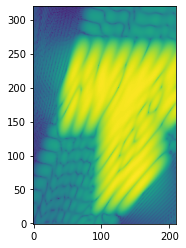

In [217]:
plt.imshow(data_pc_mag_a15[260:580,500:710], origin= 'lower') # [560:720,320:480]

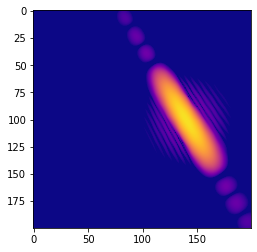

In [82]:
plt.imshow(data_mag_a0[300:500,500:700],cmap='plasma', vmin= -100, vmax = -20)

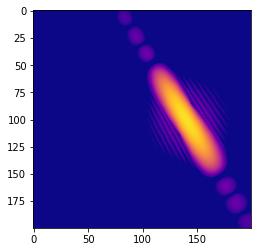

In [84]:
plt.imshow(data_mag_a10[300:500,500:700],cmap='plasma', vmin= -100, vmax = -20)

In [48]:
data_mag_a0[560:720,320:480]

array([[-192.82222274, -192.74154077, -193.83477339, ..., -175.45846327,
        -176.06976356, -176.16453059],
       [-192.52990041, -191.97164562, -191.37598147, ..., -175.67962366,
        -176.53453369, -176.82515304],
       [-189.13950946, -189.10871317, -188.97864761, ..., -175.87119541,
        -176.88084165, -177.12926342],
       ...,
       [-214.92601273, -214.39183817, -213.48792004, ..., -211.91827339,
        -207.06302348, -206.71867335],
       [-215.35555117, -214.72299764, -214.02476665, ..., -212.2644376 ,
        -207.68063542, -207.38239388],
       [-213.67448752, -212.97459163, -212.71021412, ..., -214.76686772,
        -209.61545504, -208.94480777]])

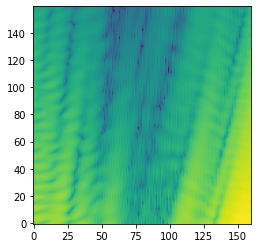

In [37]:
plt.imshow(data_mag_a0[560:720,320:480], origin= 'lower')

# Graficas

In [ ]:
prueba = "2"
data_fdbp = np.load('../image_data/FDBP_'+prueba+'_data.npy', allow_pickle='TRUE').item()
data_rma = np.load('../image_data/RMA_'+prueba+'_data.npy', allow_pickle='TRUE').item()

'Ok'

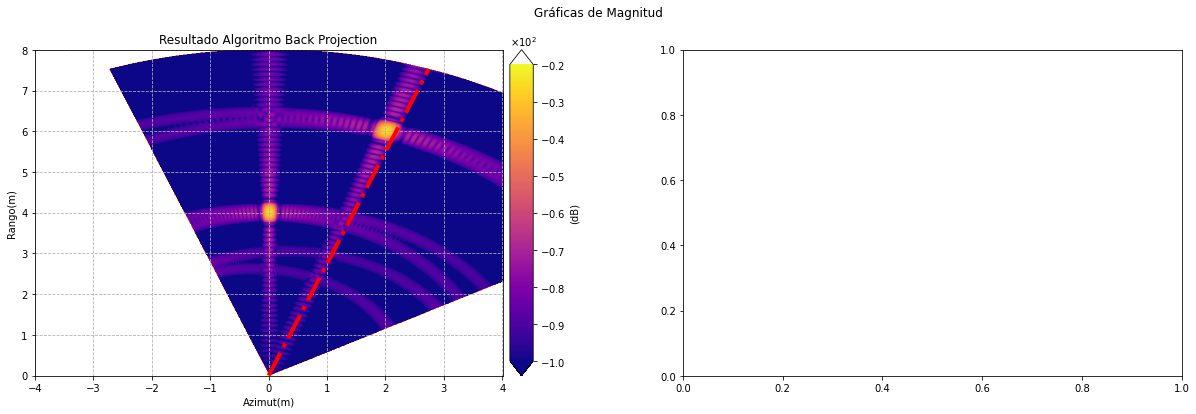

In [138]:
plot_mag(data_fdbp)

In [30]:
Im = data_fdbp['Im']
Lx = data_fdbp['Lx']
Ly = data_fdbp['Ly']
dx = data_fdbp['dx']
dy = data_fdbp['dy']

x_min=-(Lx+dx)/2; x_max=(Lx+dx)/2; y_min=0-dy/2; y_max=Ly+dy/2; unit_bar='(dB)'

xgrid = np.tile(np.linspace(x_min,x_max, Im.shape[0]),(Im.shape[0],1))
ygrid = np.tile(np.linspace(y_max,y_min, Im.shape[1]),(Im.shape[0],1)).T
th = np.arctan2(ygrid,xgrid)*180/np.pi
fc = th >30
sc =  th < 110
cond = fc*sc

In [31]:
fc = np.angle(Im)*180/np.pi >70
sc =  np.angle(Im)*180/np.pi < 110
xx, yy = Im.shape
cond = fc*sc


In [32]:
xx, yy = Im.shape
print(xx)

641


In [164]:
a = np.array([[5, 0, 3],[3, 2, 1], [4, 5, 6]])
b = np.array([[0, 0, 0],[0, 0, 0], [0, 0, 0]])
b[:]= 100
print(b)

[[100 100 100]
 [100 100 100]
 [100 100 100]]
